In [8]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms

from utils import load_checkpoint
from torch.utils.tensorboard import SummaryWriter
from get_loader import get_loader
from model import CNN2RNN
from PIL import Image
import matplotlib.pyplot as plt


In [2]:
transform = transforms.Compose(
    [
        transforms.Resize((356, 356)),
        transforms.RandomCrop((299, 299)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)
train_loader, dataset = get_loader(
    root_folder="flickr8k/images", annotation_file="flickr8k/captions.txt", transform=transform)


In [3]:
torch.backends.cudnn.benchmark = True
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
load_model = True
save_model = True

embed_size = 256
hidden_size = 256
vocab_size = len(dataset.vocab)
num_layers = 3
learning_rate = 3e-4


=> Loading checkpoint
a dog is running through a field .


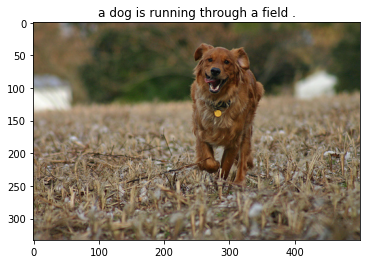

In [18]:
model = CNN2RNN(embed_size, hidden_size, vocab_size, num_layers).to(device)
criterian = nn.CrossEntropyLoss(ignore_index=dataset.vocab.stoi['<PAD>'])
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

if load_model:
    step = load_checkpoint(torch.load(
        "my_checkpoint.pth.tar"), model, optimizer)

model.eval()

img_path = os.path.join("test_images", "69189650_6687da7280.jpg")
img = Image.open(img_path).convert("RGB")
img_t = transform(img)
img_t = img_t.to(device)
preds = model.caption_image(img_t.unsqueeze(0), dataset.vocab)

print(" ".join(preds[1:-1]))
plt.title(" ".join(preds[1:-1]))
plt.imshow(img)
plt.show()
